## `Montando apresentação`

`Considerações: `
- O time de logística não considera que o atraso na entrega é um problema relevante e falou que, em média, as entregas estão sendo feitas 10 dias antes do prazo combinado.

- Não é desejado a previsão de uma entrega atrasada, apenas a exposição que esse é um problema que pode impactar os clientes.

- Não queremos a abordagem de "nenhuma entrega pode atrasar". Vamos ser mais tranquilos e seguir na linha de "uma entrega pode atrasar. Como posso melhorar a experiencia do cliente caso isso aconteça?"

### `Preparando o ambiente`

In [21]:
# Importando o sqlite3
import sqlite3

In [22]:
# Importando o pandas
import pandas as pd

In [23]:
# criando a conexão
con =sqlite3.connect('vendas.db')

In [24]:
# criando o cursor
cur = con.cursor()

In [25]:
# utilizando a função já criada
def executa_consulta(consulta):
    resultado = cur.execute(consulta).fetchall()
    resultado = pd.DataFrame(resultado)
    colunas = [i[0] for i in cur.description]
    if resultado.shape[1] > 0:
        resultado.columns = colunas
    print(resultado.shape)
    # display(resultado.head(3))
    return resultado

In [26]:
# verificando as tabelas presentes no bando de dados
executa_consulta('SELECT * FROM sqlite_schema WHERE type = "table"')

(9, 5)


,type,name,tbl_name,rootpage,sql
0,table,customers,customers,5018,"CREATE TABLE ""customers"" (\n""index"" INTEGER,\n..."
1,table,geolocation,geolocation,7660,"CREATE TABLE ""geolocation"" (\n""index"" INTEGER,..."
2,table,order_items,order_items,22586,"CREATE TABLE ""order_items"" (\n""index"" INTEGER,..."
3,table,order_payments,order_payments,27121,"CREATE TABLE ""order_payments"" (\n""index"" INTEG..."
4,table,order_reviews,order_reviews,29140,"CREATE TABLE ""order_reviews"" (\n""index"" INTEGE..."
5,table,products,products,33215,"CREATE TABLE ""products"" (\n""index"" INTEGER,\n ..."
6,table,sellers,sellers,33909,"CREATE TABLE ""sellers"" (\n""index"" INTEGER,\n ..."
7,table,product_category_name_translation,product_category_name_translation,33966,"CREATE TABLE ""product_category_name_translatio..."
8,table,orders,orders,2,"CREATE TABLE ""orders"" (\n""index"" INTEGER,\n ""..."


`1.Verificando se o atraso é um problema real`

In [27]:
# visualizando a tabela de pedidos
pedidos = executa_consulta('SELECT * FROM orders')

(99441, 9)


In [28]:
# selecionando apenas as colunas de interesse
pedidos = executa_consulta('SELECT order_id, \
                           order_purchase_timestamp, \
                           order_delivered_customer_date, \
                           order_estimated_delivery_date \
                           FROM orders')

(99441, 4)


In [29]:
# verificando as informações da base
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   order_purchase_timestamp       99441 non-null  object
 2   order_delivered_customer_date  96476 non-null  object
 3   order_estimated_delivery_date  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [30]:
# visualisando os itens nulos em order_delivered_customer_date

pedidos[pedidos['order_delivered_customer_date'].isnull()]

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,2017-04-11 12:22:08,None,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,2018-06-04 16:44:48,None,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,2018-08-03 17:44:42,None,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,2017-09-03 14:22:03,None,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,2018-01-10 11:33:07,None,2018-02-07 00:00:00
...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,2018-08-31 16:13:44,None,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,2018-01-05 23:07:24,None,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2018-09-06 18:45:47,None,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,2017-08-23 16:28:04,None,2017-09-15 00:00:00


In [31]:
# fazendo o tratamento para as colunas de datas

datas = ['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date']

for i in datas:
    pedidos[i] = pd.to_datetime(pedidos[i], format='%Y-%m-%d %H:%M:%S')

In [32]:
# verificando se foi alterado as datas
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   order_purchase_timestamp       99441 non-null  datetime64[ns]
 2   order_delivered_customer_date  96476 non-null  datetime64[ns]
 3   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(1)
memory usage: 3.0+ MB


In [33]:
# mostrando as colunas de interesse
pedidos = executa_consulta('SELECT order_id, \
                           order_purchase_timestamp, \
                           order_delivered_customer_date, \
                           order_estimated_delivery_date \
                           FROM orders')
pedidos

(99441, 4)


,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15 00:00:00


In [34]:
pedidos['delivery_delayed'] = pedidos['order_delivered_customer_date'] > pedidos['order_estimated_delivery_date']

pedidos['delivery_delayed'] = pedidos['delivery_delayed'].replace(True,'ATRASADO').replace(False,'OK')
# pedidos['delivery_delayed'] = pedidos['delivery_delayed'].replace({True: 'Pedido atrasado', False: 'Pedido em dia'})

pedidos

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,delivery_delayed
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,OK
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,OK
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,OK
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00,OK
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00,OK
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28 00:00:00,OK
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02 00:00:00,OK
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27 00:00:00,OK
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15 00:00:00,OK


In [35]:
# Fazendo o group by para obter a contagem de verdadeiros e falsos

pedidos.groupby('delivery_delayed')['delivery_delayed'].count().sort_values(ascending=False)

delivery_delayed
OK          91614
ATRASADO     7827
Name: delivery_delayed, dtype: int64

In [36]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   order_purchase_timestamp       99441 non-null  object
 2   order_delivered_customer_date  96476 non-null  object
 3   order_estimated_delivery_date  99441 non-null  object
 4   delivery_delayed               99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [37]:
# fazendo o tratamento novamente para as colunas de datas

datas = ['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date']

for i in datas:
    pedidos[i] = pd.to_datetime(pedidos[i], format='%Y-%m-%d %H:%M:%S')

In [38]:
# temos os dados que muitas entregas atrasam, vamos mostrar quanto tempo elas atrasam

# Calcula a diferença entre a data de entrega real e a data estimada de entrega
pedidos['delivery_delay_duration'] = (pedidos['order_delivered_customer_date'] - pedidos['order_estimated_delivery_date']).dt.days

pedidos

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,delivery_delayed,delivery_delay_duration
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,OK,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,OK,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,OK,-18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,OK,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,OK,-10.0
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,OK,-11.0
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,OK,-2.0
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,OK,-6.0
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,OK,-21.0


In [39]:
pedidos.groupby(['delivery_delayed','delivery_delay_duration'])['delivery_delayed'].count().sort_values(ascending=False)

delivery_delayed  delivery_delay_duration
OK                -14.0                      7126
                  -13.0                      5963
                  -15.0                      5345
                  -7.0                       4837
                  -8.0                       4828
                                             ... 
ATRASADO           137.0                        1
                   126.0                        1
                   123.0                        1
                   121.0                        1
                   165.0                        1
Name: delivery_delayed, Length: 198, dtype: int64

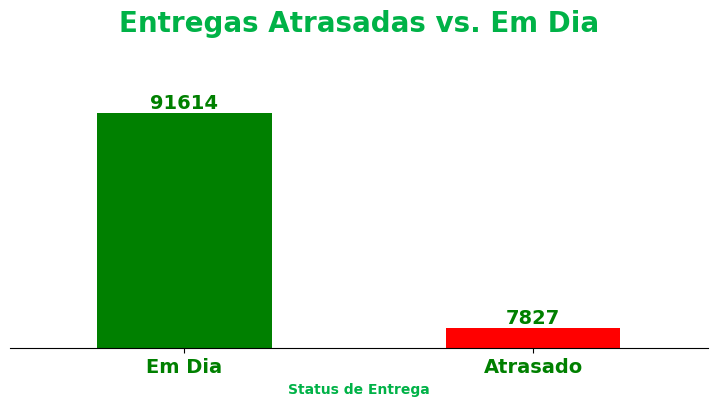

In [40]:
import matplotlib.pyplot as plt
import numpy as np


fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

ax = pedidos['delivery_delayed'].value_counts().plot(kind='bar', color=['green', 'red'])

ax.set_title("Entregas Atrasadas vs. Em Dia", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

plt.xlabel("Status de Entrega", # Título do gráfico
             fontsize=10, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )



plt.xticks([0, 1], ['Em Dia', 'Atrasado'], rotation=0, color='green',
           fontweight='bold', # Espessura da fonte dos rótulos)
)
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x



# Ver como  usar o Annotate para fazer essa parte
# Adiciona a numeração do eixo y acima das barras
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 1), ha='center',
    va='bottom',
    fontsize=14, # Tamanho da fonte dos rótulos
    fontweight='bold', # Espessura da fonte dos rótulos
    color="green", # Cor dos rótulos
    )



ax.set_yticks(np.array([0,120000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()